# Latihan Word2Vec

### Dataset yang digunakan adalah movie_reviews dari NLTK yang berisi ulasan film asli. Word2Vec digunakan untuk membentuk representasi vektor kata berdasarkan konteks kemunculannya dalam kalimat.

# 1. Import Library

In [19]:
!pip install gensim nltk scikit-learn matplotlib

In [20]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
from nltk.corpus import movie_reviews
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 2. Download Resource NLTK dan Download Dataset

In [21]:
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 3. Load Dataset

In [22]:
sentences = []

for fileid in movie_reviews.fileids():
    words = movie_reviews.words(fileid)
    sentences.append(list(words))

print("Jumlah dokumen:", len(sentences))

Jumlah dokumen: 2000


4. Cek Contoh Data

In [23]:
sentences[0][:20]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.',
 'they',
 'get',
 'into',
 'an']

# 5. Training Word2Vec

In [24]:
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=2,
    sg=1  # Skip-gram
)

# 6. Melihat Embedding Sebuah Kata

In [25]:
model.wv['movie']

array([-0.03065659,  0.02629104,  0.13219178,  0.11313023, -0.09993047,
       -0.61171013, -0.24907783,  0.09965993,  0.01387328, -0.1566892 ,
        0.08791233,  0.02411471,  0.37315536, -0.11766645,  0.39003825,
        0.24320006,  0.02316467, -0.16200383,  0.537062  , -0.44198906,
        0.12404644, -0.06282714,  0.10280035, -0.10770635,  0.19192109,
       -0.09479107, -0.43410635, -0.07401226, -0.13569497,  0.4912835 ,
        0.00166098, -0.3714586 ,  0.17145309, -0.6620715 , -0.05907773,
        0.37581894,  0.37002975, -0.04524711, -0.28917065,  0.00542257,
        0.59706324, -0.24849328, -0.14730294,  0.04320815,  0.31849286,
       -0.452034  , -0.07575349, -0.19439833, -0.28491908,  0.31570932,
        0.17377678, -0.7244983 , -0.11859617,  0.3159785 ,  0.5252815 ,
       -0.09102653, -0.002925  ,  0.1018757 , -0.43389413,  0.42271155,
       -0.16587508,  0.13321853,  0.23553924,  0.10045765,  0.33381513,
        0.08193678,  0.244675  ,  0.19696383, -0.22279586,  0.59

# 7. Mengukur Similarity Antar Kata

In [26]:
model.wv.similarity('movie', 'film')

np.float32(0.90067154)

In [27]:
model.wv.similarity('good', 'bad')

np.float32(0.6858483)

# 8. Mencari Kata yang Paling Mirip

In [28]:
model.wv.most_similar('good', topn=5)

[('decent', 0.7389398813247681),
 ('poor', 0.6937089562416077),
 ('great', 0.6893083453178406),
 ('bad', 0.6858484148979187),
 ('lousy', 0.6841188669204712)]

In [29]:
model.wv.most_similar('bad', topn=5)

[('terrible', 0.7185160517692566),
 ('awful', 0.7063245177268982),
 ('good', 0.6858483552932739),
 ('simply', 0.6781347990036011),
 ('tough', 0.673448920249939)]

# 9. Mengambil Kata untuk Visualisasi

In [30]:
words = list(model.wv.index_to_key)[:100]
vectors = np.array([model.wv[word] for word in words])

# 10. Visualisasi PCA

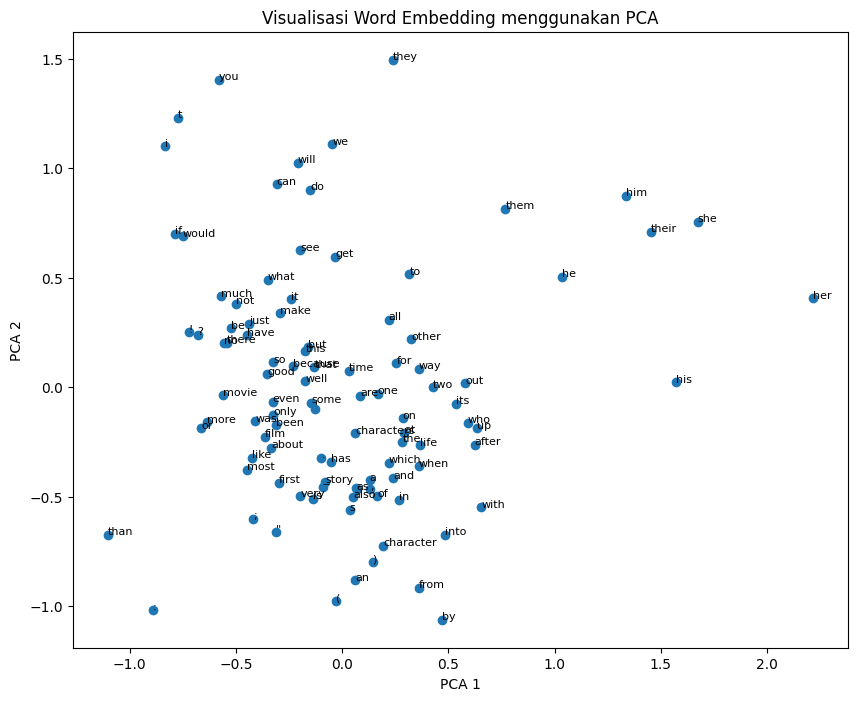

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

plt.title("Visualisasi Word Embedding menggunakan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# 11. Visualisasi t-SNE

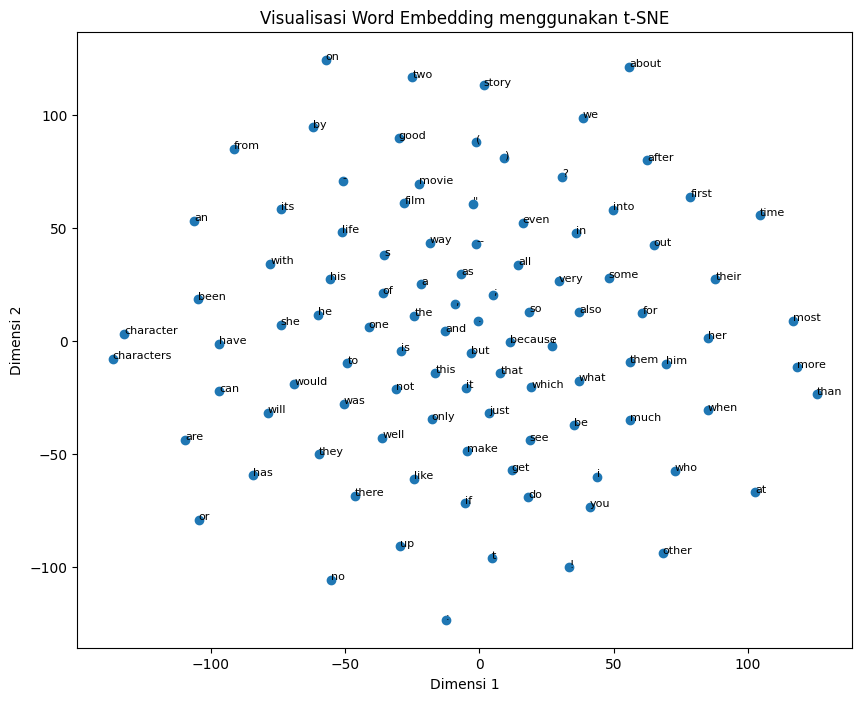

In [32]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=8)

plt.title("Visualisasi Word Embedding menggunakan t-SNE")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.show()

# 12. Kesimpulan

### Berdasarkan hasil eksperimen, Word2Vec berhasil menghasilkan representasi vektor kata dari dataset review film. Visualisasi menggunakan PCA dan t-SNE menunjukkan adanya pengelompokan kata berdasarkan kesamaan konteks, sehingga membuktikan bahwa Word2Vec mampu menangkap hubungan semantik antar kata.